In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv

# 2

## a) Load the training data hw1xtr.dat and hw1ytr.dat into the memory and plot it on one graph. Load the test data hw1xte.dat and hw1yte.dat into the memory and plot it on another graph.

In [2]:
xtrain = np.loadtxt("hw1xtr.dat")
ytrain = np.loadtxt("hw1ytr.dat")

xtest = np.loadtxt("hw1xte.dat")
ytest = np.loadtxt("hw1yte.dat")

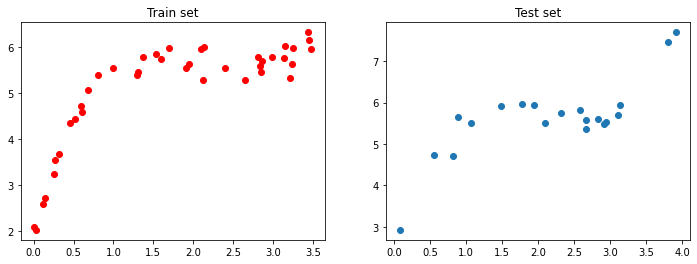

In [3]:
plt.figure(figsize=[12, 4])
plt.subplot(121)
plt.plot(xtrain, ytrain, 'ro')
plt.title('Train set')

plt.subplot(122)
plt.plot(xtest, ytest, 'o')
plt.title('Test set')
plt.show()



## b) Add a column vector of 1’s to the features, then use the linear regression formula discussed in Lecture 3 to obtain a 2-dimensional weight vector. Plot both the linear regression line and the training data on the same graph. Also report the average error on the training set using Eq. (1).

In [4]:
def data_preprocess(x):
    length = len(x)
    x = np.append(x, np.ones(length))
    x = x.reshape(2, length)
    x = x.T
    return x

def calculate_w(x, y):
    return np.dot(np.dot(inv (np.dot(np.transpose(x), x)), np.transpose(x)), np.transpose(y))


In [5]:
X = data_preprocess(xtrain)
w = calculate_w(X, ytrain)

In [6]:
w

array([0.76663448, 3.71375748])

Text(0.5, 1.0, 'Train set')

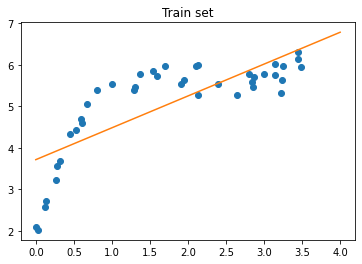

In [7]:
x_lin = np.linspace(0, 4.0, num=100)
y_lin = x_lin * w[0] + w[1]

plt.plot(xtrain, ytrain, 'o')
plt.plot(x_lin, y_lin, '-')
plt.title('Train set')


In [8]:
def cal_avg_error(x, w, y):
    y_pred = x * w[0] + w[1]

    return np.sum((y_pred - y)**2) / len(y)

In [9]:
avg_train_error = cal_avg_error(xtrain, w, ytrain)

In [10]:
print("The average error on the train set is %f" % avg_train_error)

The average error on the train set is 0.508589


## c) Plot both the regression line and the test data on the same graph. Also report the err = m average error on the test set using Eq.

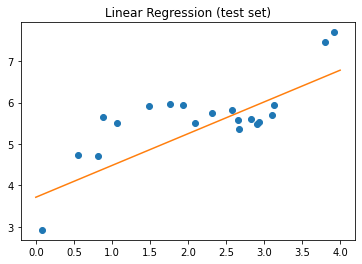

In [11]:
x_lin = np.linspace(0, 4.0, num=100)
y_lin = x_lin * w[0] + w[1]

plt.title("Linear Regression (test set)")
plt.plot(xtest, ytest, 'o')
plt.plot(x_lin, y_lin, '-')


In [12]:
avg_test_error = cal_avg_error(xtest, w, ytest)

print("The average error on the test set is %f" % avg_test_error)

The average error on the test set is 0.443912


## d) Implement the 2nd-order polynomial regression by adding new features x2 to the inputs. Repeat (b) and (c). Compare the training error and test error. Is it a better fit than linear regression?

## 

In [13]:
X2 = np.insert(X, 0, values=xtrain ** 2, axis=1)
w2 = calculate_w(X2, ytrain)

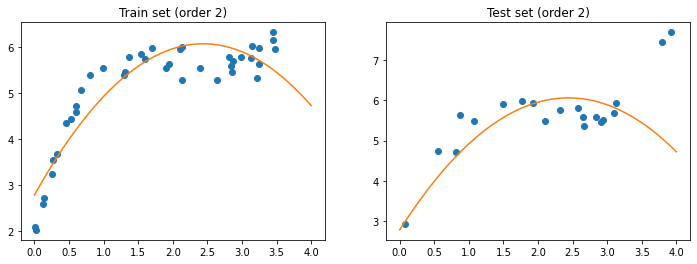

In [14]:
x_lin = np.linspace(0, 4.0, num=100)
y_lin =  w2[0] * x_lin * x_lin + w2[1] * x_lin + w2[2]

plt.figure(figsize=[12, 4])
plt.subplot(121)
plt.plot(xtrain, ytrain, 'o')
plt.plot(x_lin, y_lin, '-')
plt.title('Train set (order 2)')

plt.subplot(122)
plt.plot(xtest, ytest, 'o')
plt.plot(x_lin, y_lin, '-')
plt.title('Test set (order 2)')
plt.show()

In [15]:
ytrain_pred = w2[0] * (xtrain ** 2) + w2[1] * xtrain + w2[2] 
avg_train_err = np.sum((ytrain_pred - ytrain)**2) / len(ytrain)
ytest_pred = w2[0] *( xtest ** 2) + w2[1] * xtest + w2[2] 
avg_test_err = np.sum((ytest_pred - ytest)**2) / len(ytest)

print("The average error on the train set is %f" % avg_train_err)
print("The average error on the test set is %f" % avg_test_err)

The average error on the train set is 0.200985
The average error on the test set is 0.853263


## e) Implement the 3rd-order polynomial regression by adding new features x2,x3 to the inputs. Repeat (b) and (c). Compare the training error and test error. Is it a better fit than linear regression and 2nd-order polynomial regression?

In [16]:
X3 = np.insert(X2, 0, values=xtrain ** 3, axis=1)

w3 = calculate_w(X3, ytrain)

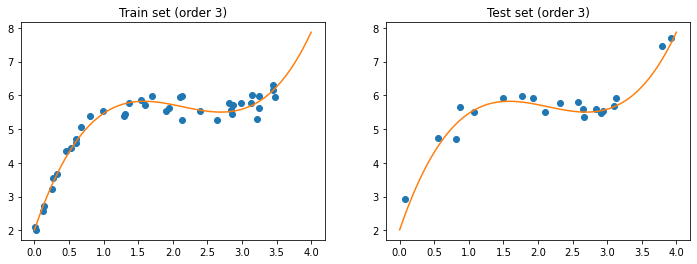

In [17]:
y_lin =  w3[0] * x_lin * x_lin * x_lin + w3[1] * x_lin * x_lin + w3[2] * x_lin  + w3[3]

plt.figure(figsize=[12, 4])
plt.subplot(121)
plt.plot(xtrain, ytrain, 'o')
plt.plot(x_lin, y_lin, '-')
plt.title('Train set (order 3)')

plt.subplot(122)
plt.plot(xtest, ytest, 'o')
plt.plot(x_lin, y_lin, '-')
plt.title('Test set (order 3)')
plt.show()

In [18]:
ytrain_pred =  w3[0] * xtrain ** 3 + w3[1]* xtrain ** 2 + w3[2] * xtrain + w3[3]
avg_train_err = np.sum((ytrain_pred - ytrain)**2) / len(ytrain)
ytest_pred = w3[0] * xtest ** 3 + w3[1]* xtest ** 2 + w3[2] * xtest + w3[3]
avg_test_err = np.sum((ytest_pred - ytest)**2) / len(ytest)

print("The average error on the train set is %f" % avg_train_err)
print("The average error on the test set is %f" % avg_test_err)

The average error on the train set is 0.039229
The average error on the test set is 0.056418


## f) Implement the 4th-order polynomial regression by adding new features x2,x3,x4 to the inputs. Repeat (b) and (c). Compare the training error and test error. Compared with the previous results, which order is the best for fitting the data?

In [19]:
X4 = np.insert(X3, 0, values=xtrain ** 4, axis=1)

w4 = calculate_w(X4, ytrain)

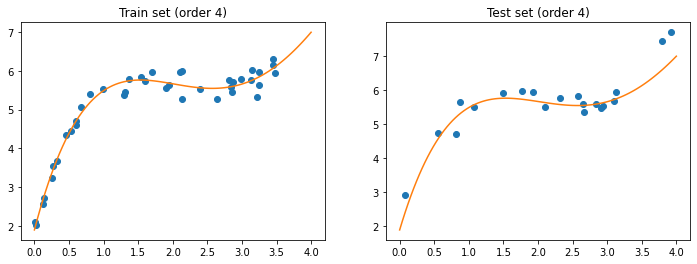

In [20]:
y_lin =  w4[0] * (x_lin **4) + w4[1] * (x_lin **3) + w4[2] * (x_lin **2)  + w4[3] * x_lin + w4[4]

plt.figure(figsize=[12, 4])
plt.subplot(121)
plt.plot(xtrain, ytrain, 'o')
plt.plot(x_lin, y_lin, '-')
plt.title('Train set (order 4)')

plt.subplot(122)
plt.plot(xtest, ytest, 'o')
plt.plot(x_lin, y_lin, '-')
plt.title('Test set (order 4)')
plt.show()

In [21]:
ytrain_pred =  w4[0] * (xtrain ** 4) + w4[1] * (xtrain ** 3) + w4[2] * (xtrain ** 2) + w4[3] * xtrain + w4[4]
avg_train_err = np.sum((ytrain_pred - ytrain)**2) / len(ytrain)
ytest_pred = w4[0] * (xtest ** 4) + w4[1] * (xtest ** 3) + w4[2] * (xtest ** 2) + w4[3] * xtest + w4[4]
avg_test_err = np.sum((ytest_pred - ytest)**2) / len(ytest)

print("The average error on the train set is %f" % avg_train_err)
print("The average error on the test set is %f" % avg_test_err)

The average error on the train set is 0.035645
The average error on the test set is 0.127222


# 3

## a)  Using the training data to implement l2-regularized for the 4th-order polynomial regres- sion (page 12 of Lecture 4, note that we do not penalize the bias term w0), vary the regularization parameter λ ∈ {0.01,0.1,1,10,100,1000}. Plot the training and test error (averaged over all in- stances) using Eq. (1) as a function of λ (you should use a log10 scale for λ). Which λ is the best for fitting the data?

In [22]:
lambda_list = [0.01, 0.1, 1, 10, 100, 1000]

def optimal_w_4th_reg(x, lam, y):
    xtx = np.dot(x.T, x) 

    ide = np.identity(xtx.shape[0])
    ide[4][4] = 0

    return  inv(xtx+ lam *ide) @ x.T @ y


def cal_loss_4th_reg(x, weight , y, lam):
    y_pred = weight[0] * (x ** 4) + weight[1] * (x ** 3) + weight[2] * (x ** 2) + weight[3] * x + weight[4]

    return  np.sum((y_pred - y)**2)/len(y) 

weight_list = []
loss_train_list = []
loss_test_list = []

for lam in lambda_list:
    w_star = optimal_w_4th_reg(X4, lam, ytrain)

    loss_train =  cal_loss_4th_reg(xtrain, w_star , ytrain, lam)
    loss_test =  cal_loss_4th_reg(xtest, w_star , ytest, lam)

    loss_train_list.append(loss_train)
    loss_test_list.append(loss_test)

    weight_list.append(w_star)



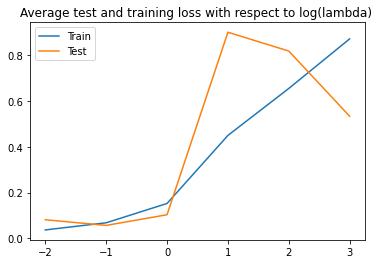

In [23]:

lambda_list_log_10 = [-2, -1, 0, 1, 2, 3]

plt.plot(lambda_list_log_10, loss_train_list, '-')
plt.plot(lambda_list_log_10, loss_test_list, '-')
plt.title('Average test and training loss with respect to log(lambda) ')
plt.legend(['Train', 'Test'])
plt.show()

## b) Plot the value of each weight parameter (including the bias term w0) as a function of λ.

In [24]:
def get_col(weight_list, index):
    temp = []
    for weight in weight_list:
        temp.append(weight[index])

    return temp

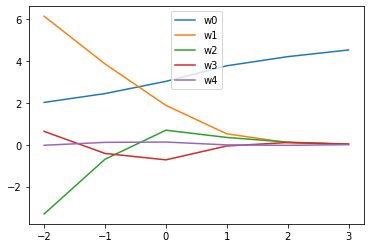

In [25]:
plt.plot(lambda_list_log_10, get_col(weight_list, 4), '-')
plt.plot(lambda_list_log_10, get_col(weight_list, 3), '-')
plt.plot(lambda_list_log_10, get_col(weight_list, 2), '-')
plt.plot(lambda_list_log_10, get_col(weight_list, 1), '-')
plt.plot(lambda_list_log_10, get_col(weight_list, 0), '-')

plt.legend(['w0', 'w1', 'w2', 'w3', 'w4'])

## c) Write a procedure that performs five-fold cross-validation on your training data 

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
Xtrain = X4
Ytrain = ytrain

In [28]:
Xtrain, x1, Ytrain, y1 = train_test_split(Xtrain, Ytrain, test_size=0.20, random_state=42)
Xtrain, x2, Ytrain, y2 = train_test_split(Xtrain, Ytrain, test_size=0.25, random_state=42)
Xtrain, x3, Ytrain, y3 = train_test_split(Xtrain, Ytrain, test_size=0.33, random_state=42)
x4, x5, y4, y5 = train_test_split(Xtrain, Ytrain, test_size=0.5, random_state=42)

xtrain1 = np.append(np.append(np.append(x1, x2), x3), x4).reshape(32,5)
xtrain2 = np.append(np.append(np.append(x1, x2), x3), x5).reshape(32,5)
xtrain3 = np.append(np.append(np.append(x1, x2), x4), x5).reshape(32,5)
xtrain4 = np.append(np.append(np.append(x1, x3), x4), x5).reshape(32,5)
xtrain5 = np.append(np.append(np.append(x2, x3), x4), x5).reshape(32,5)

ytrain1 = np.append(np.append(np.append(y1, y2), y3), y4)
ytrain2 = np.append(np.append(np.append(y1, y2), y3), y5)
ytrain3 = np.append(np.append(np.append(y1, y2), y4), y5)
ytrain4 = np.append(np.append(np.append(y1, y3), y4), y5)
ytrain5 = np.append(np.append(np.append(y2, y3), y4), y5)


l = [(xtrain1, ytrain1, x5, y5), (xtrain2, ytrain2, x4, y4),
    (xtrain3, ytrain3, x3, y3), (xtrain4, ytrain4, x2, y2), (xtrain5, ytrain5, x1, y1)]

In [29]:
loss_val_list = []
for lam in lambda_list:
    loss = 0
    for x_train, y_train, x_val, y_val in l:
        w_star = optimal_w_4th_reg(x_train, lam, y_train)
        
        y_pred = np.dot(x_val, w_star)
        loss +=  np.sum((y_pred - y_val)**2)/len(y_val) 
    
    loss_val_list.append(loss / 5)
    


Text(0.5, 1.0, 'cross validation result for each lambda')

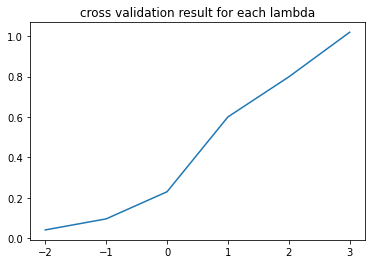

In [30]:
plt.plot(lambda_list_log_10, loss_val_list, '-')
plt.title("cross validation result for each lambda")

In [31]:
w_opt = optimal_w_4th_reg(X4, 0.01, ytrain)
w_opt

array([-0.02664967,  0.63319474, -3.29909683,  6.12222833,  2.01558646])

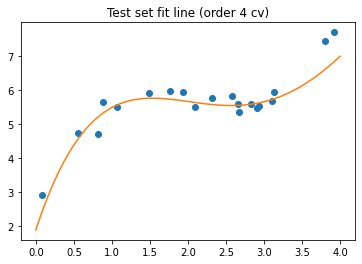

In [32]:
y_pred = w_opt[0] * (x_lin ** 4) + w_opt[1] * (x_lin ** 3) + w_opt[2] * (x_lin ** 2) + w_opt[3] * x_lin + w_opt[4]

plt.plot(xtest, ytest, 'o')
plt.plot(x_lin, y_lin, '-')
plt.title('Test set fit line (order 4 cv)')
plt.show()